In [30]:
## setup analysis
import numpy as np
import cv2
from matplotlib import pyplot as plt
execfile(r'D:\measuring\analysis\scripts\setup_analysis.py')
filename = r'D:\measuring\Labview\CCDcamera\Bitmarker_field_of_view.dat'
# filename = r'D:\measuring\Labview\CCDcamera\Bitmarker_and_stripline.dat'
%matplotlib inline
from itertools import compress
from analysis.lib.image_analysis import camera_tools as ct; reload(ct)

<module 'analysis.lib.image_analysis.camera_tools' from 'd:/measuring\analysis\lib\image_analysis\camera_tools.pyc'>

(150, 150)
[[  4.01317925e-02   9.99194395e-01  -5.89892815e+00]
 [ -9.99194395e-01   4.01317925e-02   2.93859390e+02]]


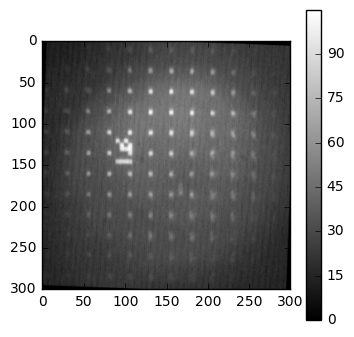

In [31]:
### do some fast image loading via numpy
array2d = np.loadtxt(filename,delimiter='\t',ndmin = 2)
# show_image(array2d)
array_prepared = ct.stamp_out_relevant_field_of_view(ct.apply_brightness_filter(array2d,0)) ## cut out background
array_prepared = ct.rotate_image(array_prepared,90-2.3)#-1.36)

### 70 is good for bit marker resolution
### 60 is good for marker resolution
# ct.show_image(array_prepared)
laplacian = cv2.Laplacian(array_prepared,cv2.CV_64F,ksize=21)
laplacian = (laplacian-(np.amax(laplacian)+np.amin(laplacian))/2.) ## centre around 0
laplacian = 2*laplacian/(np.amax(laplacian)-np.amin(laplacian)) ## normalize to interval of -1 to 1
# show_image(apply_brightness_filter(laplacian,-1.0,threshold_max= 0.2))
filtered_laplacian = ct.apply_brightness_filter(laplacian,-1.0,threshold_max= 0.2)
# show_image(filtered_laplacian)
# ct.make_binary(ct.rescale_to_8_bit_grayscale(array_prepared),120)
unfiltered_edges = cv2.Canny(ct.rescale_to_8_bit_grayscale(ct.make_binary(ct.rescale_to_8_bit_grayscale(array_prepared),150))
                                     ,100,185)
ct.show_image(array_prepared,size =4)

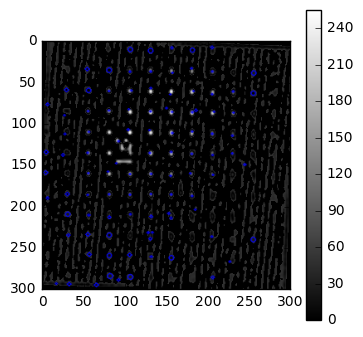

In [32]:
im_with_keypoints,keypoints  = ct.find_marker_grid_via_blob_finder(filtered_laplacian)
laplace_8bit = ct.rescale_to_8_bit_grayscale(filtered_laplacian)
ct.show_image(im_with_keypoints,size = 4)

In [33]:
len(keypoints) ## 81 keypoints in this image. ### we should make a filter that circumvents and detects debris on the diamond
## the other image has 85 keypoints.

99

d:/measuring\analysis\lib\fitting\fit.py:99: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if not success or cov == None: # FIXME: find a better solution!!!


this is the average slope:  0.00555374719499
this is the average grid distance 20.9099934457
6 7
angle is therefore:  0.31820300322


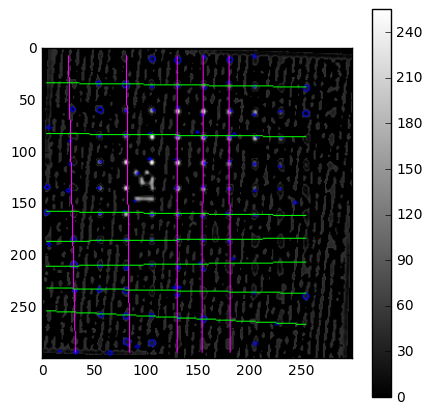

In [34]:
avg_slope,avg_distance,x0,y0 = ct.estimate_grid_from_keypts(im_with_keypoints,keypoints,plot_fitted_lines = True)
print 'angle is therefore: ', np.arctan(avg_slope)*180/np.pi
ct.show_image(im_with_keypoints,size = 5)

In [35]:
all_marker_pts = ct.get_grid_crossing_pts(x0,y0,avg_slope,avg_distance)
filtered_img = ct.stamp_out_marker_grid_onto_im(laplace_8bit,all_marker_pts,3)

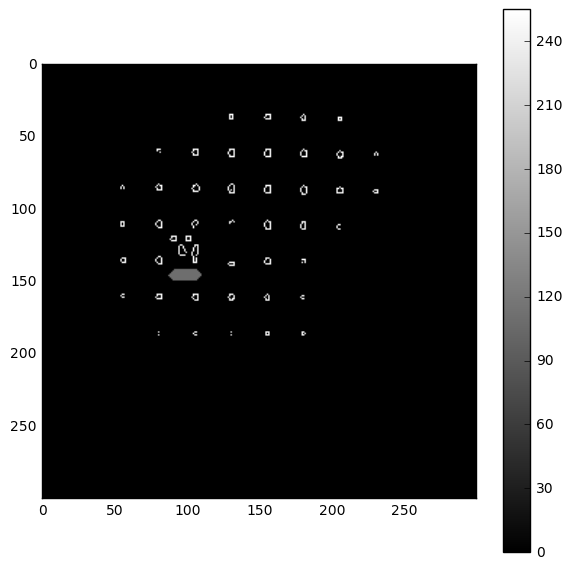

In [36]:
bit_x,bit_y = ct.find_bit_marker_in_image(filtered_img)

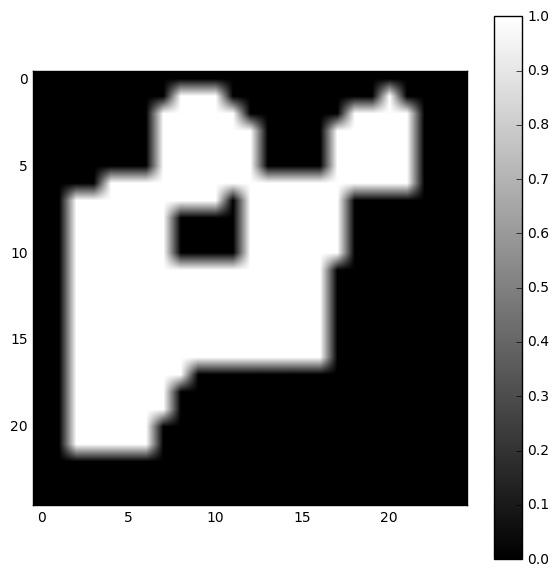

array([[ 0.,  1.,  0.,  1.],
       [ 1.,  0.,  1.,  0.],
       [ 1.,  1.,  1.,  0.],
       [ 1.,  0.,  0.,  0.]])

In [37]:
binary_bit_marker = ct.zoom_in_on_bitmarker(array_prepared,bit_x,bit_y)
ct.show_image(np.fliplr(binary_bit_marker))
np.flipud(np.reshape(ct.get_bit_marker_string(binary_bit_marker),(4,4)))

In [4]:
dxf_path = r'D:\measuring\Labview\CCDcamera\20161121_mrkrchip_Hillary_two_lines.dxf'

In [39]:
#### we make the original file now in a different way....
#### we know the size of the file and how far the bitmarkers go.
### resolution is set to be 200 nm.

diamond_x = 3### in mm
diamond_y = 3 ### in mm
np.zeros((int(diamond_x*1e3),int(diamond_y*1e3))) ###### resolution is assumed to be 1 um, later blown up via a kronecker product.


###

#### numbers for hillary x_max 35; y_max = 14
def generate_idealized_bit_markers(img,offset_x,offset_y,x_max = 35,y_max = 14,pitch = 60):
    
def add_striplines_to_img():
    pass

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [58]:
bitmnumber = 20
reload(ct)
bitm_array = ct.generate_bitm_array(5)

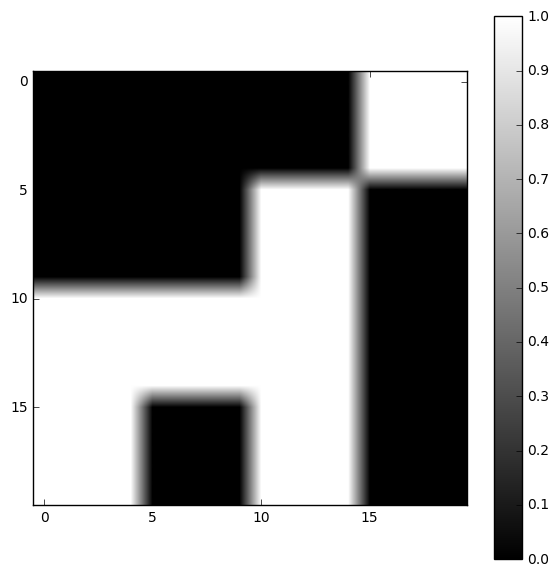

In [65]:
bitm_array = ct.generate_bitm_array(2+3+5+7+9)
ct.show_image(np.kron(bitm_array,np.ones((5,5))))